In [1]:
import matplotlib.pyplot as plt
import numpy as np

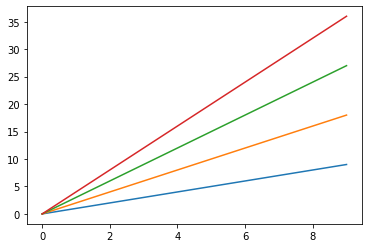

In [8]:
x = np.arange(10)
fig, ax = plt.subplots()

lines = []
for i in range(1, 5):
#     line, = ax.plot(x, i * x, label=r'$y={}x$'.format(i))
    line, = ax.plot(x, i * x)
    
    lines.append(line)
lines

#ax.legend();

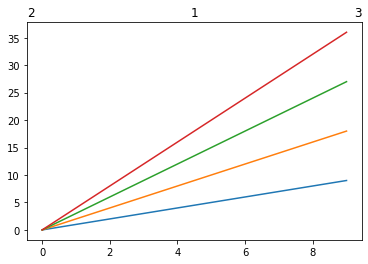

In [19]:
fig.get_children()
fig.get_axes()
fig.gca().get_children()[10].set_text('1')
fig.gca().get_children()[11].set_text('2')
fig.gca().get_children()[12].set_text('3')
fig

In [9]:
ax.lines[0].get_linewidth()

1.5

In [10]:
ax.legend(loc='upper left', fancybox=True, framealpha=1, 
          shadow=True, borderpad=1)

h, l = ax.get_legend_handles_labels()
fig
print(l[0])


$y=1x$


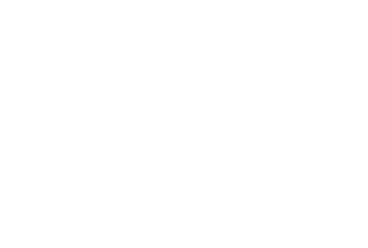

In [7]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

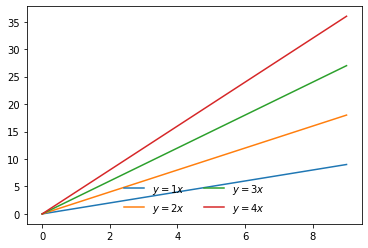

In [12]:
fig.axes[0].set_visible(True)
fig.set_visible(True)
fig

In [ ]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

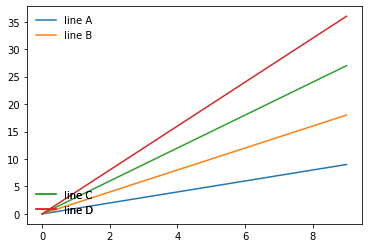

In [14]:
# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper left', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower left', frameon=False)

ax.add_artist(leg);
fig

In [13]:
ax.get_legend().remove()
# ax.get_legend().set_visible(False)
fig

AttributeError: 'NoneType' object has no attribute 'set_visible'

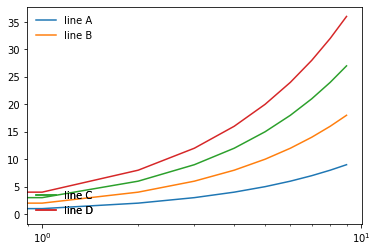

In [15]:
ax.set_xscale('log')
ax.legend
fig

In [16]:
xdata, ydata = lines[0].get_data()
xdata

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
color = lines[2].get_c()
color

'#2ca02c'

In [4]:
lines[0].set_color('#2ca02c')
fig

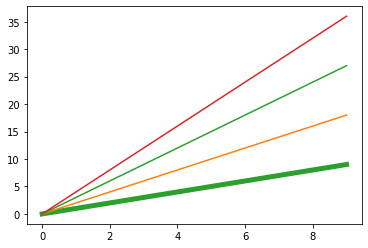

In [7]:
lines[0].set_linewidth(5)
fig

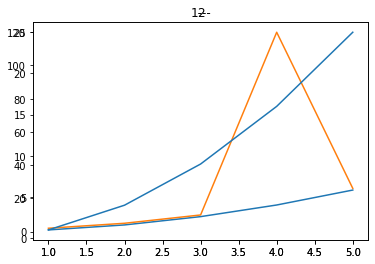

In [60]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
y11 = [2, 5, 10, 120, 26]
y2 = [2, 6, 10, 100, 9]
fig = plt.figure()
axes = []
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax2.patch.set_alpha(0.0)
ax1.set_title('1---') 
ax2.set_title('2') 

lines = []
lines.append(ax1.plot(x, y, label='y1'))
lines.append(ax1.plot(x, y11, label='y11'))
lines.append(ax2.plot(x, y, label='y2'))

# ax2.set_visible(False)
# ax1.lines[0].set_alpha(0.0)
ax1.autoscale(enable=True, axis='y')

# ax1.lines[0].set_alpha(0.0)
# ax1.lines[1].set_alpha(1.0)
# ax2.set_visible(False)

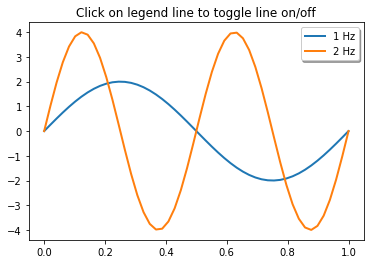

In [20]:
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0, 1)
y1 = 2 * np.sin(2*np.pi*t)
y2 = 4 * np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, label='1 Hz')
line2, = ax.plot(t, y2, lw=2, label='2 Hz')
leg = ax.legend(fancybox=True, shadow=True)

lines = [line1, line2]
lined = {}  # Will map legend lines to original lines.
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(True)  # Enable picking on the legend line.
    lined[legline] = origline


def on_pick(event):
    # On the pick event, find the original line corresponding to the legend
    # proxy line, and toggle its visibility.
    legline = event.artist
    origline = lined[legline]
    visible = not origline.get_visible()
    origline.set_visible(visible)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled.
    legline.set_alpha(1.0 if visible else 0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', on_pick)
plt.show()

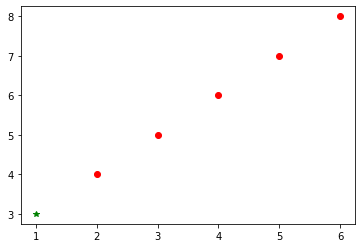

In [4]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6]
y = [3,4,5,6,7,8]

plt.plot(x[1:], y[1:], 'ro')
plt.plot(x[0], y[0], 'g*')

plt.show()

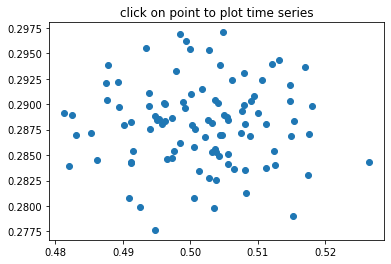

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.rand(100, 1000)
xs = np.mean(X, axis=1)
ys = np.std(X, axis=1)

fig, ax = plt.subplots()
ax.set_title('click on point to plot time series')
line, = ax.plot(xs, ys, 'o', picker=True, pickradius=5)  # 5 points tolerance


def onpick(event):
    if event.artist != line:
        return
    n = len(event.ind)
    if not n:
        return
    fig, axs = plt.subplots(n, squeeze=False)
    for dataind, ax in zip(event.ind, axs.flat):
        ax.plot(X[dataind])
        ax.text(0.05, 0.9,
                f"$\\mu$={xs[dataind]:1.3f}\n$\\sigma$={ys[dataind]:1.3f}",
                transform=ax.transAxes, verticalalignment='top')
        ax.set_ylim(-0.5, 1.5)
    fig.show()
    return True


fig.canvas.mpl_connect('pick_event', onpick)
plt.show()

No handles with labels found to put in legend.


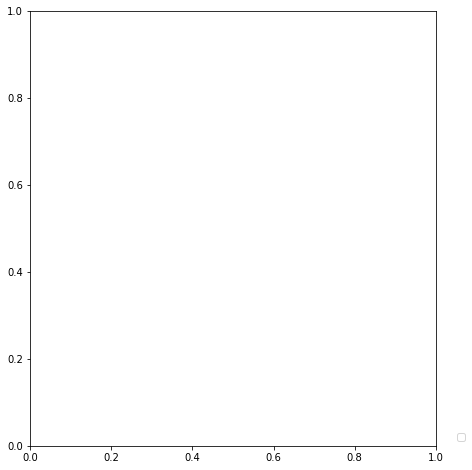

In [35]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
y2 = [-30, 6, 10, 100, 9]


fig, _ = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

line = Line2D(x,y, label='line1')
line2 = Line2D(x,y2)
fig.axes[0].add_line(line)
fig.axes[0].add_line(line2)

fig.axes[0].plot()
for l in fig.axes[0].lines:
    if (l == line2):
        fig.axes[0].lines.remove(l)
legends = fig.axes[0].get_legend()
fig.axes[0].legend(bbox_to_anchor=(1.04,0),loc="lower left")
fig.axes[0].set_visible(False)
fig.axes[1].legends = legends
fig.axes[1].legend(bbox_to_anchor=(1.04,0),loc="lower left")
